# 코로나 확산 추이 확인을 위한 기초 탐색  
---  

### 개요  
- 지역별 코로아 확진자 확산의 추이를 확인하기 위한 기초 탐색 과정  

### 목차  
1. 데이터 로드
2. 지역별 누적 확진자 수_파이 그래프
3. 날짜별 지역 누적 확진자 수 추이_라인 그래프
4. 날짜별 지역 누적 확진자 수 추이_라인 그래프

###     시각화  

- 지역별 누적 확진자 수_파이그래프
- 날짜별 지역 누적 확진자 추이_라인 그래프
- 1~3월 지역별 누적 확진자 추이_라인 그래프  

### 인사이트 도출

- 6월 기준, '대구, 경북, 서울, 경기'지역의 확진자가 가장 많음
- 정확한 원인은 확인할 수 없으나, 2월부터 3월까지 코로나 감염자 수가 급증함

### 개선사항

- 판다스를 이용하는 것 보다 R로 파이 그래프를 그리는게 훨씬 효율적임
- 라인 그래프 생성시 'date' 컬럼이 str 형식으로 되어있음. 이때 그래프를 그리면 x축 라벨이 복잡해짐. date 타입으로 변경하면 자동으로 월단위로 바꿔줌


---
## 1. 데이터 로드

In [1]:
#모듈 임포트

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint as pp

In [2]:
df_TimeProvince = pd.read_csv('/home/seong/workspace/covid/Data/TimeProvince.csv')
df_TimeProvince.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


---
## 2. 지역별 누적 확진자 수
 - 6월 30일 기준 지역별 누적확진자 확인을 위한 파이그래프  
 - 전체 확진자 중 지역별 지분 대한 정보를 확인하기 위한 기초 탐색 과정

In [3]:
## 데이터 가공

# 지역별 누적확진자 값 중 2020년 6월 30일 기준값들만 가져옴
sizes = df_TimeProvince.groupby('province')['confirmed'].max()

# 지역별로 groupby했기 때문에 이때의 index는 지역명이됨
labels_data = sizes.index

# 지역별 2020년 6월 30일 기준 누적확진자들의 값이 담김
data = sizes.values

x = labels_data # 파이 그래프에 들어갈 범례
y = data  # 파이 그래프에서 공간을 차지할 값

# 전체 중 해당 값이 차지하는 비율 (소숫점으로 나오기 떄문에 100을 곱함 ==> 100.0 * (해당 데이터 / 전체 누적확진자))
percent = 100.*(y/y.sum()) 

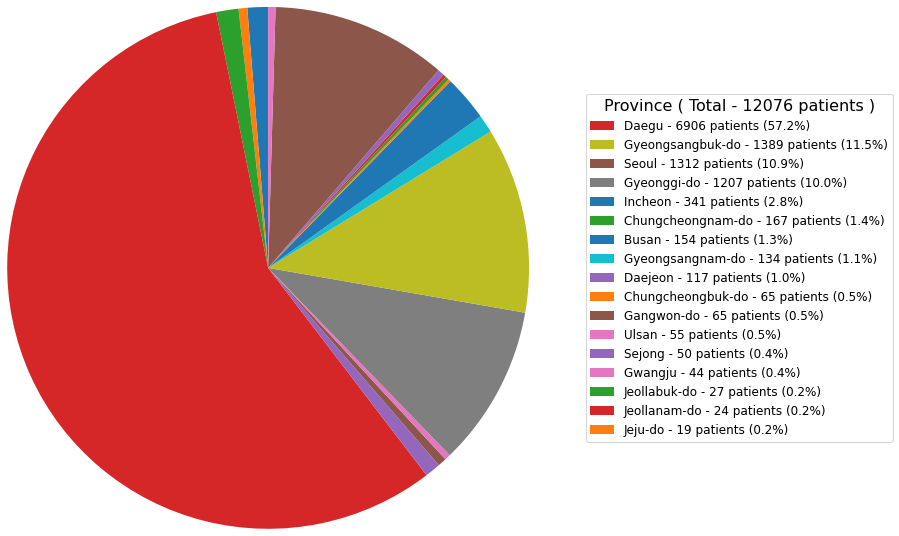

In [4]:
## 파이 그래프 생성

# 앵글 90도로 파이 그래프 생성
patches, texts = plt.pie(y, startangle=90, radius=3)

# 내포 리스트 사용 : x, y, porcent를 한 행으로 만들어서 뽑아 범례 속 내용 후 리스트에 반환
labels =  ['{0} - {1} patients ({2:1.1f}%)'.format(i, k, j) for i,k, j in zip(x, y, percent)] 
sort_legend = True # 범례 정렬

# 차지 비율이 높은 순서로 정렬
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y), key=lambda x: x[2],reverse=True))  
    
# 범례 제목과 전체 확진자 수 입력을 위해 생성한 문자
titles = 'Province ( Total - {} patients )'.format(data.sum())

# 범례 설정
plt.legend(patches, labels, loc=7, bbox_to_anchor=(3.4, 0.5), fontsize=12, title=titles, title_fontsize=16)

#그래프 확인
plt.show()


# plt.savefig('지역별_6월30일기준_누적확진자_파이그래프', bbox_inches='tight') # 그림파일로 그래프를 저장함

---
## 3. 날짜별 지역 누적 확진자 수 추이
 - 시간에 따른 전체 지역의 누적확진자 변화를 확인하기 위한 그래프
 - 시간별, 지역별 누적 확진자의 변화
 - 시간에 따른 변화를 확인하기 위한 '라인 그래프'

In [5]:
## 데이터 가공

df_TimeProvince_fin = df_TimeProvince[['date', 'province', 'confirmed']]

# 'date' 컬럼의 타입 변환
df_TimeProvince_fin['date'] = pd.to_datetime(df_TimeProvince_fin['date'])

/home/seong/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


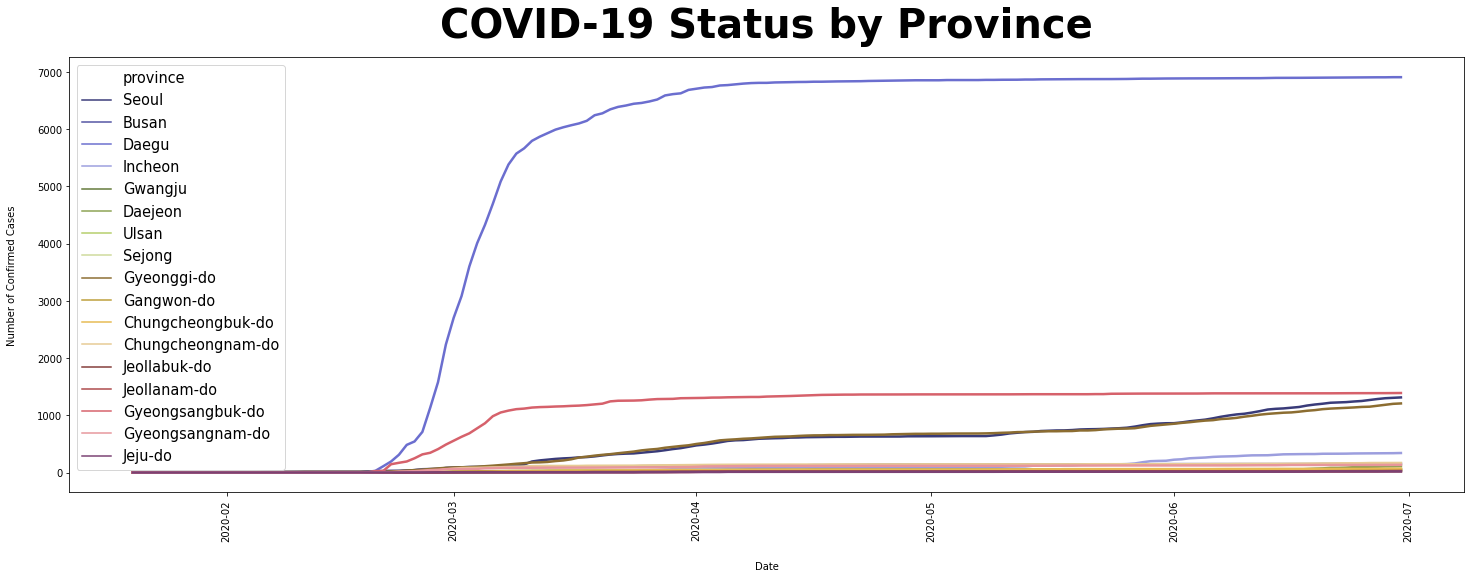

In [6]:
## 라인 그래프 생성

frame= plt.figure(figsize= (25, 8))
frame= plt.xticks(rotation= 90) # X축 계급을 90도로 돌려서 표시

grid = sns.lineplot(
    x= "date",
    y= "confirmed",
    hue= "province",
    data= df_TimeProvince_fin,
    palette= "tab20b",
    linewidth= 2.5
    );

## 그래프 세부 레이아웃 설정

grid.set_title("COVID-19 Status by Province", pad = 20, 
               fontdict={'fontsize':40, 'fontweight':'bold' })
grid.set_ylabel("Number of Confirmed Cases", labelpad=20)
grid.set_xlabel("Date",  labelpad=20)
grid.legend(fontsize=14.5)
sns.set(font_scale = 2)
plt.show()

# plt.savefig('지역별_누적확진자_추이_라인그래프', bbox_inches='tight') # 그림파일로 그래프를 저장함

---
## 4. 1~3월 지역 누적 확진자 수 추이
 - 3번 시각화에서 급증을 보여 준 시점인 1~3월의 추이를 자세히 확인해보기 위한 과정
 - 대구, 경북의 급증 현상의 시점, 변곡점 확인 가능

In [7]:
## 데이터 가공

# 2020년 3월 31일 이전까지의 지역별 누적 확진자 수 정보 추출
df_timeProvince_1To3= df_TimeProvince_fin[df_TimeProvince_fin.date<= "2020-03-31"]

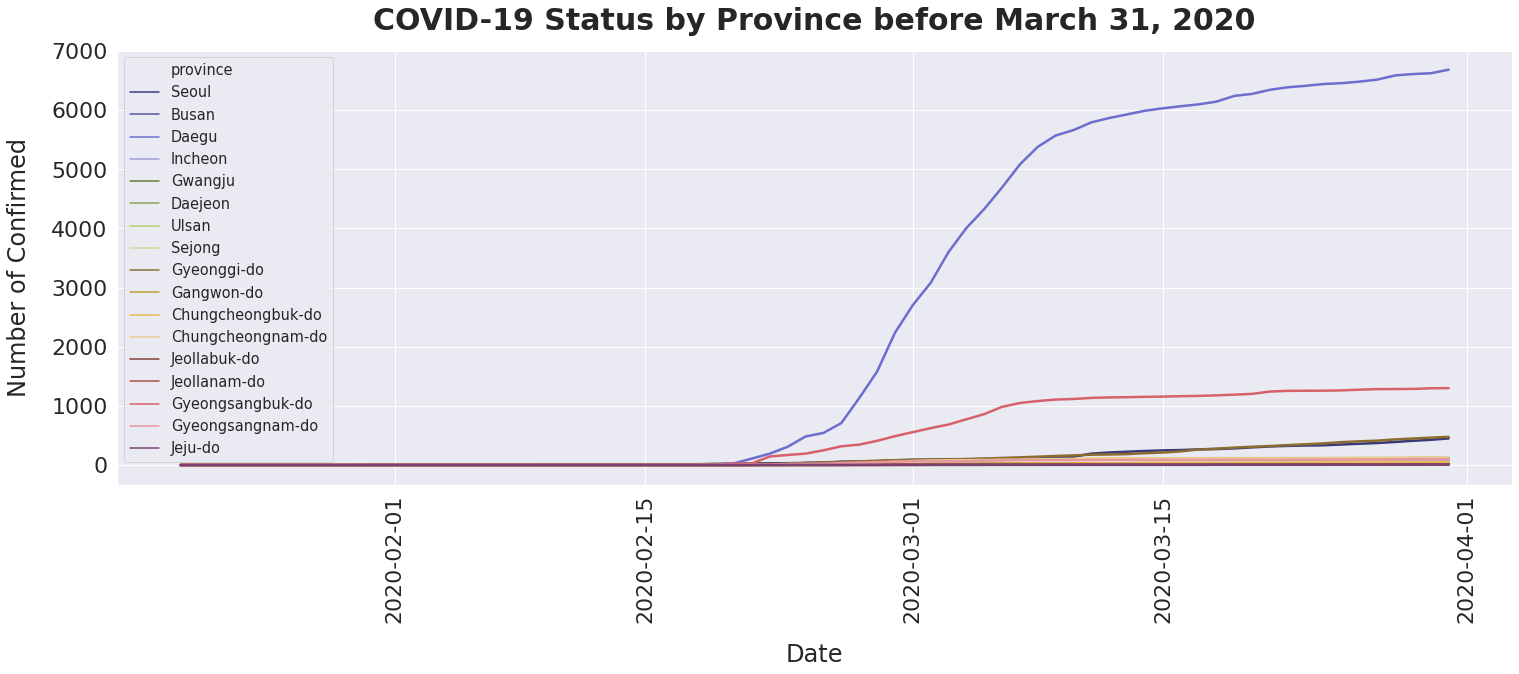

In [8]:
## 라인 그래프 생성

frame= plt.figure(figsize= (25, 8))
frame= plt.xticks(rotation= 90) # X축 계급을 90도로 돌려서 표시

grid = sns.lineplot(
    x= "date",
    y= "confirmed",
    hue= "province",
    data= df_timeProvince_1To3,
    palette= "tab20b",
    linewidth= 2.5
    );

## 그래프 세부 레이아웃 설정

grid.set_title("COVID-19 Status by Province before March 31, 2020", 
               pad = 20, fontdict={'fontsize':30, 'fontweight':'bold' })
grid.set_ylabel("Number of Confirmed", labelpad=20)
grid.set_xlabel("Date",  labelpad=20)
grid.legend(fontsize=14.5)
sns.set(font_scale = 2)

# plt.savefig('1_to_3월_지역별_누적확진자_추이_라인그래프', bbox_inches='tight') # 그림파일로 그래프를 저장함